In [1]:
!pip install /kaggle/input/tmllibs/mllibs-0.0.9-py3-none-any.whl --force-reinstall

Processing /kaggle/input/tmllibs/mllibs-0.0.9-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/kaggle/input/tmllibs/mllibs-0.0.9-py3-none-any.whl'



#1 | TASK1 - WEB SCRAPING TO GAIN COMPANY INSIGHTS

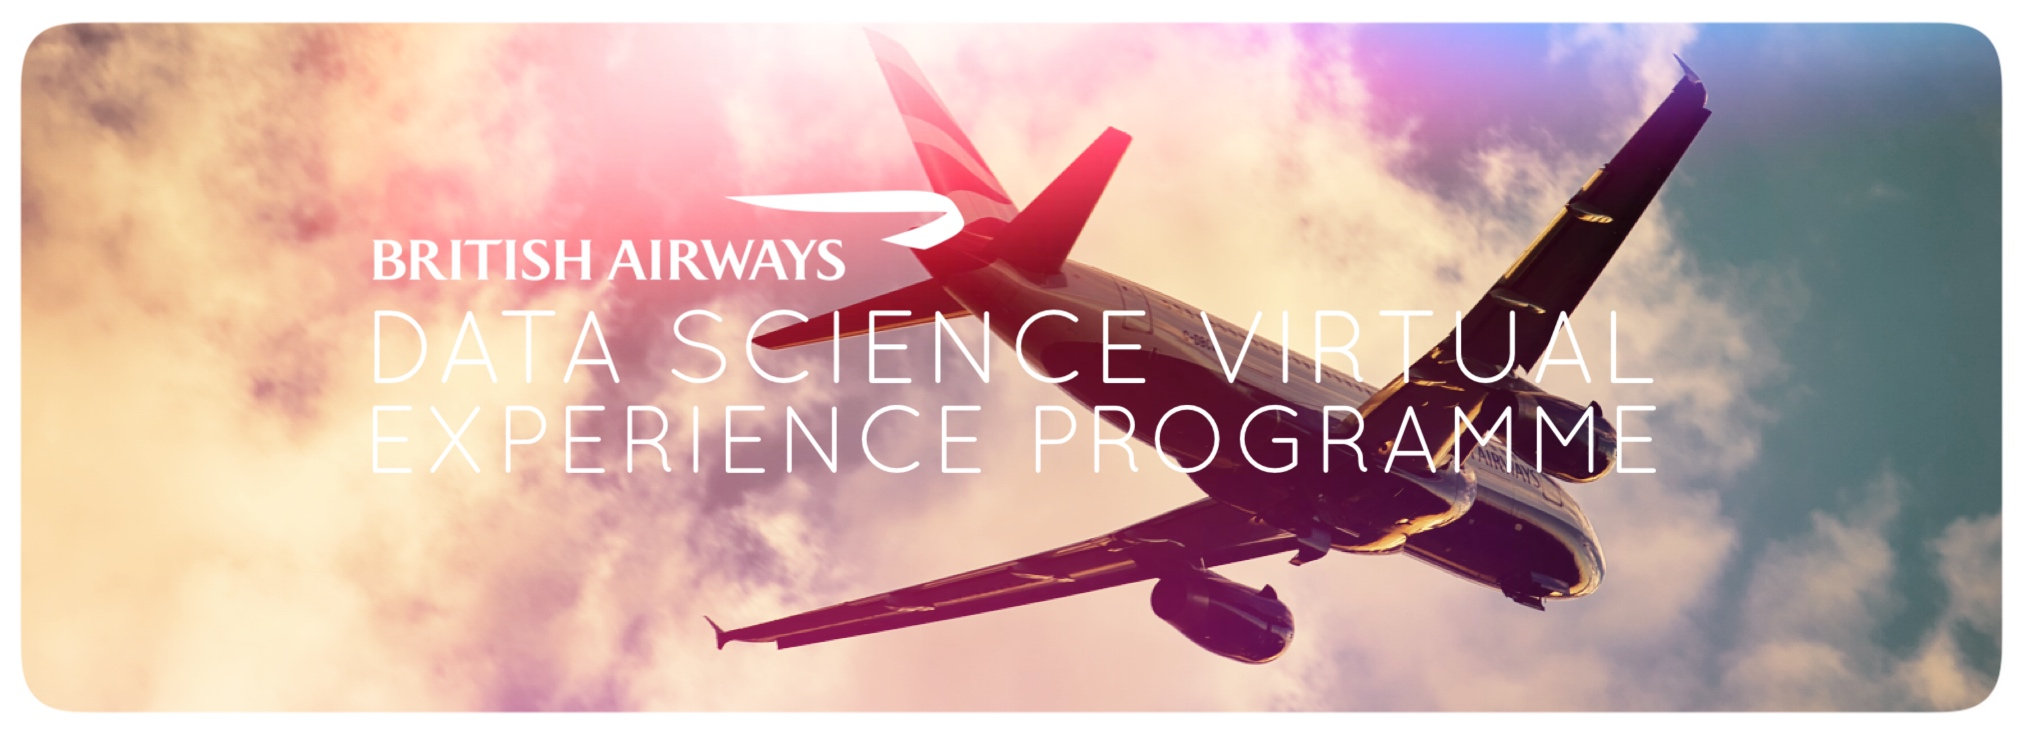


British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

HERE IS THE TASK

Scrape data from the web (customer_reviews.csv)

The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data.

Analyse data

Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Please ensure that you have created a folder called "data" and mapped your file path.

Present insights

Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import panel as pn
from tqdm.notebook import tqdm

pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

def show_panel(df):
    return pn.widgets.Tabulator(df.head(50),
                    show_index=False,
                    pagination='local',
                    widths={'reviews':'100%'},
                    page_size=10)

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df1 = pd.read_csv('BA_reviews.csv')
show_panel(reviews)

Tabulator(page_size=10, pagination='local', show_index=False, value=    Unnamed: 0            ..., widths={'reviews': '100%'})

In [ ]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


There are no null values/ missing values in out dataset. The dataset contains 1000 unique entries. Removing (✅ Trip Verified | and Not Verified | ) to clean the data. Removing any leading or trailing spaces. Turning the review string to all lower case.

In [ ]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0  original flight was cancelled with no explanat...
1             1  airport check in was functionary with little w...
2             2  flight fine. in-line with competitors. pleasan...
3             3  came from glasgow to london and took connectin...
4             4  my flight on on 12 may 2023 got delayed an hou...
..          ...                                                ...
995         995  washington to frankfurt via london. check-in a...
996         996  rome to london. our flight was delayed from ro...
997         997  i always like travelling on a ba a380. seats i...
998         998  london heathrow to düsseldorf. really good cre...
999         999  london to athens. since i started using ba in ...

[1000 rows x 2 columns]


## Task 1.1 Sentiment analysis of reviews using nltk


## Task 1.2 Analyze

In [ ]:
#The percentage of various types of tags.

(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    33.0
Neutral      1.4
Positive    65.6
dtype: float64

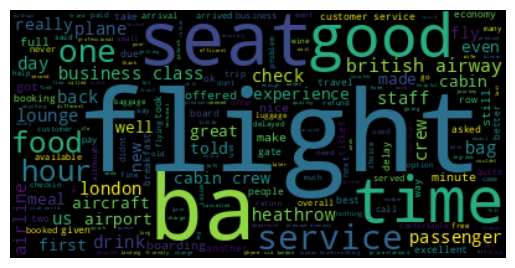

In [ ]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

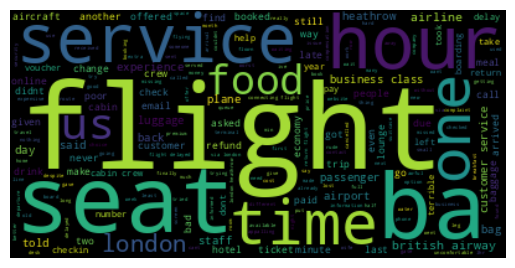

In [ ]:
text2= " "
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

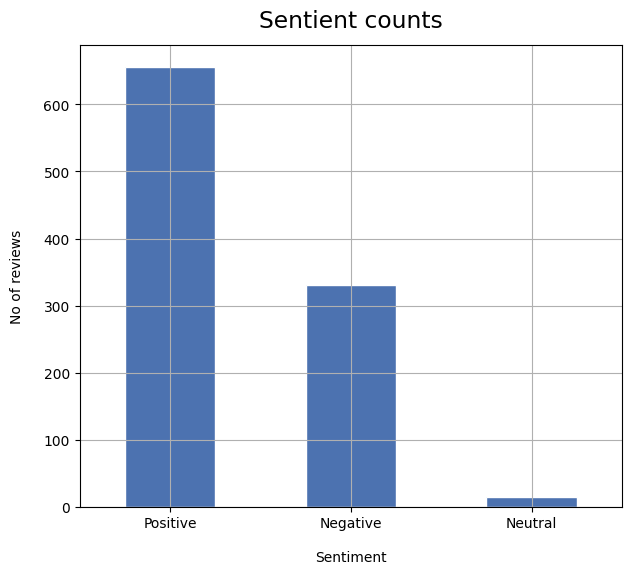

In [ ]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);

In [ ]:
#Remove Punctuations
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      original flight was cancelled with no explanat...
1      airport check in was functionary with little w...
2      flight fine inline with competitors pleasant c...
3      came from glasgow to london and took connectin...
4      my flight on on 12 may 2023 got delayed an hou...
                             ...                        
995    washington to frankfurt via london checkin at ...
996    rome to london our flight was delayed from rom...
997    i always like travelling on a ba a380 seats in...
998    london heathrow to düsseldorf really good crew...
999    london to athens since i started using ba in 2...
Name: reviews, Length: 1000, dtype: object


<ipython-input-16-b6292fd0a296>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

airport check in was functionary with little warmth but some efficiency flight was delayed with no communication given boarding was chaotic and no management of the process by ground staff seats on board are tight and you really feel like they have crammed in every seat possible there is next to no recline however i was thankful that there was no recline if the person in front had even the slightest recline they would be in my face owing to how tight the seats were spaced on this a321 aircraft no amenities on this flight except for a toilet that was clean but small no ife no food and beverage unless you pay extra but the staff were friendly luggage arrived at the carousel within a very short amount of time
['original', 'flight', 'was', 'cancelled', 'with', 'no', 'explanation', 'there', 'was', 'no', 'representative', 'to', 'help', 'in', 'rebooking', 'we', 'had', 'to', 'call', 'customer', 'service', 'long', 'distance', 'call', 'the', 'line', 'kept', 'dropping', 'had', 'to', 'do', '40', '

In [ ]:
#Removing stopwords

df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  original flight cancelled explanation represen...
1            1  airport check functionary little warmth effici...
2            2  flight fine inline competitors pleasant crew n...
3            3  came glasgow london took connecting flight ame...
4            4  flight 12 may 2023 got delayed hour 25 minutes...
5            5  cairo 5 hour flight ba considers short haul ev...
6            6  travelling london madrid british airways iberi...
7            7  luggage mistagged dallas way cairo via london ...
8            8  airline lost luggage absolutely awful througho...
9            9  booked ba website round trip flights seattle a...
10          10  first time flying ba business class never boar...
11          11  buy sandwiches crisps dont expect hot meal pla...
12          12  twoforone review covering economy business cla...
13          13  absolutely horrible airline communication terr...
14        

In [ ]:
#Calculate polarity to gather sentiment tags.

def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  polarity  \
0             0  original flight cancelled explanation represen...  0.252273   
1             1  airport check functionary little warmth effici...  0.009474   
2             2  flight fine inline competitors pleasant crew n...  0.383333   
3             3  came glasgow london took connecting flight ame...  0.000000   
4             4  flight 12 may 2023 got delayed hour 25 minutes...  0.007016   
..          ...                                                ...       ...   
995         995  washington frankfurt via london checkin dulles...  0.141359   
996         996  rome london flight delayed rome hour could con...  0.000000   
997         997  always like travelling ba a380 seats economy c...  0.088889   
998         998  london heathrow düsseldorf really good crew le...  0.354762   
999         999  london athens since started using ba 2011 say ... -0.039062   

          tag  
0    Positive  
1    Po

#2 | TASK2 - PREDICT CUSTOMER BUYING BEHAVIOUR
BACKGROUND INFORMATION

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

HERE IS THE TASK

Explore and prepare the dataset (customer_booking.csv)

First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task.

Train a machine learning model

When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

Evaluate model and present findings

After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager.

It is recommended that the analysis portion of this task is done in Python.



In [29]:
df2 = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df2.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:


num_passengers = number of passengers travelling


sales_channel = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

purchase_lead = number of days between travel date and booking date

length_of_stay = number of days spent at destination

flight_hour = hour of flight departure

flight_day = day of week of flight departure

route = origin -> destination flight route

booking_origin = country from where booking was made

wants_extra_baggage = if the customer wanted extra baggage in the booking

wants_preferred_seat = if the customer wanted a preferred seat in the booking

wants_in_flight_meals = if the customer wanted in-flight meals in the booking

flight_duration = total duration of flight (in hours)

booking_complete = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [32]:
df2["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [34]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df2["flight_day"] = df2["flight_day"].map(mapping)

In [35]:
feature_names=df2.columns

In [37]:
df2.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The .describe() method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.


From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [40]:
#Now we create two different dataset one for features or independent variables which is x and one for our target column or dependent variable which is y.

x= pd.DataFrame(df2.iloc[:, [0,3,4,5,6,9,10,11,12] ].values)
y= df2.iloc[:, -1].values

In [41]:
#we rename the feature dataframe columns because in future it will help us to understand which feature in more important for the prediction.

x.rename(columns = {0:'num_passengers', 1:'purchase_lead',
                              2:'length_of_stay',3:'flight_hour',4:'flight_day',5:'wants_extra_baggage',6:'wants_preferred_seat',7:'wants_in_flight_meals',8:'flight_duration'}, inplace = True)

In [42]:
x.shape
y.shape

(50000,)

In [43]:
#Importing train test split from scikit learn to create our tarining and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [44]:
#Now we will scale our dataset it helps with any biasness present for any values. For that we import StandardScaler from scikit learn.

from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 20, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [46]:
#After scaling we can apply our random forest to the train dataset and for that we import RandomForestClassifier from scikit learn

#Now that Random forest is applied and stored in classifier we can check our prediction score, In this case the score in 0.99 which is very good model.

classifier.score(x_train, y_train)

0.9908533333333334

In [47]:
classifier.feature_importances_

array([0.05535679, 0.29895668, 0.16813457, 0.19617971, 0.11403392,
       0.01408146, 0.01526502, 0.0225126 , 0.11547926])

Text(0.5, 0, 'Feature Importance')

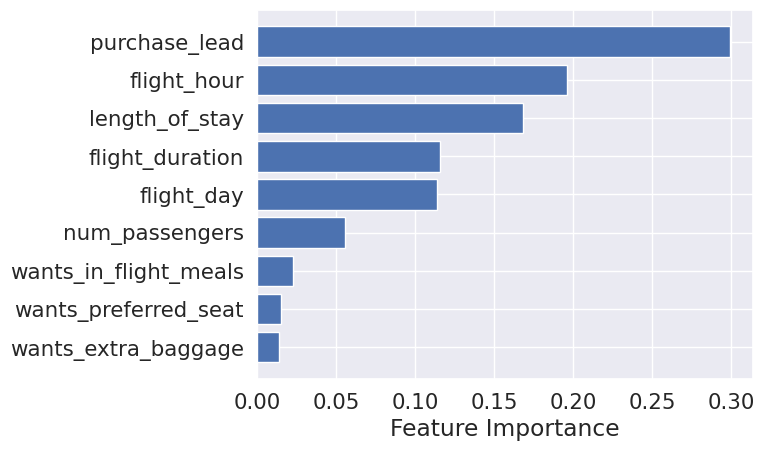

In [48]:
#Now we can calculate and plot the feature importance of the dataframe, we can do the random forest agian with omiting the less important features that usually does improve prediction but as we got 0.99 we can ignore that part.

sort = classifier.feature_importances_.argsort()
plt.barh(x.columns[sort], classifier.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [49]:
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [50]:
y_pred= classifier.predict(x_test)

In [55]:
import numpy as np
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.84336


In [57]:
#Calculation for error calculation and accuracy score which we can import from scikit learn matrics

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

Text(86.25, 0.5, 'Truth')

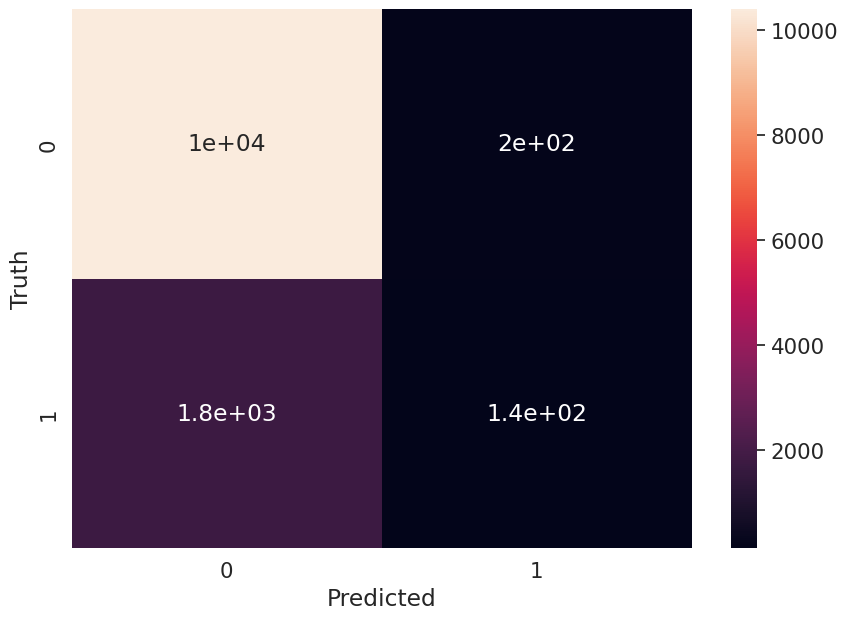

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')